In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

import numpy as np
import os,cv2

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset.zip to dataset (1).zip


In [ ]:
import zipfile
import os

zip_path = "dataset.zip"  # change this to your actual filename if different

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")  # extract to 'dataset/' folder


In [ ]:
import os

for root, dirs, files in os.walk("dataset"):
    print(root, "->", len(files), "files")


dataset -> 0 files
dataset/dataset -> 0 files
dataset/dataset/Iris -> 2 files
dataset/dataset/faces -> 0 files
dataset/dataset/faces/Akshay -> 50 files
dataset/dataset/faces/Ajay -> 50 files
dataset/dataset/faces/Alia -> 50 files
dataset/dataset/faces/Deepika -> 50 files
dataset/dataset/faces/Ileana -> 50 files
dataset/dataset/faces/Amitabh -> 50 files
dataset/dataset/faces/Farhan -> 50 files
dataset/dataset/faces/Disha -> 50 files
dataset/dataset/faces/Aamir -> 50 files


In [ ]:
import os

for root, dirs, files in os.walk("dataset"):
    print("📁", root)
    for fname in files:
        print("   📄", fname)


📁 dataset
📁 dataset/dataset
📁 dataset/dataset/Iris
   📄 iris.data
   📄 iris.names
📁 dataset/dataset/faces
📁 dataset/dataset/faces/Akshay
   📄 face_117.png
   📄 face_119.jpg
   📄 face_82.jpg
   📄 face_113.jpg
   📄 face_71.jpg
   📄 face_75.jpg
   📄 face_36.jpg
   📄 face_91.jpg
   📄 face_121.png
   📄 face_47.jpg
   📄 face_59.jpg
   📄 face_115.jpg
   📄 face_20.jpg
   📄 face_12.jpg
   📄 face_94.jpg
   📄 face_3.jpg
   📄 face_60.jpg
   📄 face_65.jpg
   📄 face_57.jpg
   📄 face_108.jpg
   📄 face_27.jpg
   📄 face_22.png
   📄 face_111.jpg
   📄 face_99.jpg
   📄 face_33.jpg
   📄 face_31.jpg
   📄 face_107.jpg
   📄 face_88.jpg
   📄 face_37.jpg
   📄 face_116.jpg
   📄 face_105.jpg
   📄 face_68.jpg
   📄 face_58.jpg
   📄 face_103.jpg
   📄 face_77.jpg
   📄 face_96.jpg
   📄 face_48.jpg
   📄 face_24.jpg
   📄 face_86.jpg
   📄 face_30.jpg
   📄 face_17.jpg
   📄 face_97.jpg
   📄 face_6.jpg
   📄 face_87.jpg
   📄 face_35.jpg
   📄 face_49.jpg
   📄 face_101.jpg
   📄 face_18.jpg
   📄 face_38.jpg
   📄 face_34.jpg
📁 d

In [ ]:

dir_name = "dataset/dataset/faces/"

y = [];x=[];target_names =[]
person_id = 0;h=w=300
n_samples =0
class_names =[]
for person_name in os.listdir(dir_name):
    #print(person_name)
    dir_path= dir_name+person_name+'/'
    class_names.append(person_name)

    for image_name in os.listdir(dir_path):
      image_path = dir_path+image_name
      img= cv2.imread(image_path)
      gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      resized_image = cv2.resize(gray,(h,w))
      v= resized_image.flatten()
      x.append(v)
      n_samples = n_samples+1
      y.append(person_id)
      target_names.append(person_name)
    person_id=person_id+1


y=np.array(y)
x=np.array(x)
target_names=np.array(target_names)
n_features = x.shape[1]

print(y.shape)
print(x.shape)
print(target_names.shape)

n_classes= target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# #############################################################################







(450,)
(450, 90000)
(450,)
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


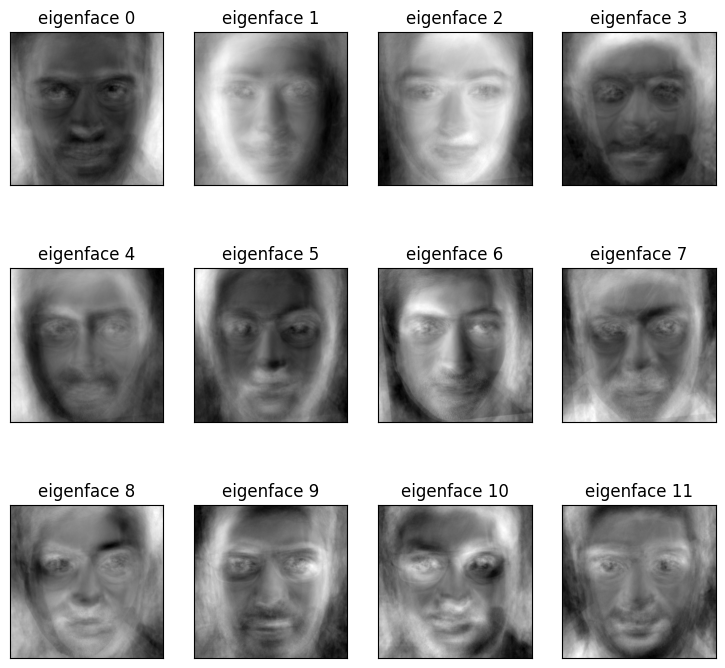

projecting the input data on the eigenfaces orthonormal basis
(337, 150)
(113, 150)
project done


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
n_components=150
print("Extracting the top %d eigenfaces from %d faces"% (n_components, x_train.shape[0]))

pca =PCA(n_components=n_components,svd_solver='randomized',whiten=True).fit(x_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenfaces_titles = ["eigenface %d" %  i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces,eigenfaces_titles,h,w)
plt.show()

print("projecting the input data on the eigenfaces orthonormal basis")
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)
lda =LinearDiscriminantAnalysis()
lda.fit(x_train_pca,y_train)
x_train_lda = lda.transform(x_train_pca)
x_test_lda = lda.transform(x_test_pca)
print("project done")


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10,10), random_state=1,max_iter=1000, verbose = True).fit(x_train_lda,y_train)
print("model weights")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.96271753
Iteration 2, loss = 2.91065611
Iteration 3, loss = 2.85681986
Iteration 4, loss = 2.80660213
Iteration 5, loss = 2.75480129
Iteration 6, loss = 2.70755683
Iteration 7, loss = 2.65976407
Iteration 8, loss = 2.61440461
Iteration 9, loss = 2.56968662
Iteration 10, loss = 2.52812196
Iteration 11, loss = 2.48565970
Iteration 12, loss = 2.44495248
Iteration 13, loss = 2.40528393
Iteration 14, loss = 2.36967483
Iteration 15, loss = 2.33263923
Iteration 16, loss = 2.29972990
Iteration 17, loss = 2.26594723
Iteration 18, loss = 2.23550297
Iteration 19, loss = 2.20679973
Iteration 20, loss = 2.17793390
Iteration 21, loss = 2.15000250
Iteration 22, loss = 2.12551550
Iteration 23, loss = 2.09931193
Iteration 24, loss = 2.07538507
Iteration 25, loss = 2.05262013
Iteration 26, loss = 2.03057530
Iteration 27, loss = 2.00988585
Iteration 28, loss = 1.98875969
Iteration 29, loss = 1.96959191
Iteration 30, loss = 1.95036510
Iteration 31, loss = 1.93219183
Iteration 32, los

accuracy: 69.91150442477876


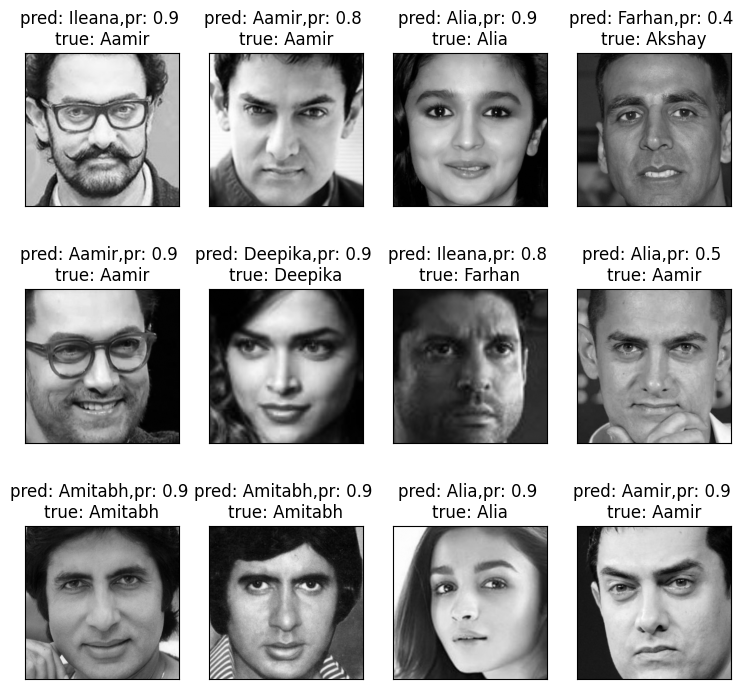

In [ ]:
y_pred = []
y_prob = []
for test_face in x_test_lda:
  prob = clf.predict_proba([test_face])[0]
  class_id = np.where(prob == np.max(prob))[0][0]
  y_pred.append(class_id)
  y_prob.append(np.max(prob))

y_pred = np.array(y_pred)

prediction_titles =[]
true_positive = 0
for i in range(y_pred.shape[0]):
  true_name = class_names[y_test[i]]
  pred_name = class_names[y_pred[i]]
  result = 'pred: %s,pr: %s \ntrue: %s' % (pred_name,str(y_prob[i])[0:3],true_name)
  prediction_titles.append(result)
  if true_name == pred_name:
    true_positive += 1
print("accuracy:",true_positive*100/y_pred.shape[0])

plot_gallery(x_test,prediction_titles,h,w)
plt.show()